## Welcome!
This is the first notebook in the series of building a machine learning based recommendation model on Databricks!

Let's start out by loading the data:

In [0]:
sales_transactions = spark.read.table("samples.bakehouse.sales_transactions")


### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>


Let's see what databricks offers that can help us hold a grasp of what's going on in the data.

1. We will have a look at our first way of analyzing the data via `dbutils.data.summarize(<spark or pandas dataframe>)`
You can immediately see that we have all the interesting summary in one view: data types, counts, missingness, mean, mode... distribution! Isn't it amazing.

In [0]:
dbutils.data.summarize(sales_transa)

<!DOCTYPE html>

But hold on, there are more ways! 

2. Let's see how  `describe(<spark or pandas dataframe>)` works like.

As you can see with this command, you'll have the neat table available for download. In fact you can generate the same output summary as the previous command by clicking on '+' and adding a data profile card.

In [0]:
display(sales_transactions.describe())

summary,transactionID,customerID,franchiseID,product,quantity,unitPrice,totalPrice,paymentMethod,cardNumber
count,3333,3333,3333,3333,3333,3333,3333,3333,3333
mean,2001666.0,1000147.7476747675,3000023.393039304,null,6.647764776477648,3.0,19.943294329432945,null,2.6755053421517895E15
stddev,962.298550346587,87.26061198561233,13.983967823514183,null,6.544484308501409,0.0,19.633452925504177,null,1.887867127995582E15
min,2000000,1000000,3000000,Austin Almond Biscotti,1,3,3,amex,340007480537384
max,2003332,1000299,3000047,Tokyo Tidbits,60,3,180,visa,5599856254505085


Another way is to just use display and then within the outpur create custom visualizations.

In [0]:
display(sales_transactions)

transactionID,customerID,franchiseID,dateTime,product,quantity,unitPrice,totalPrice,paymentMethod,cardNumber
2002961,1000253,3000047,2024-05-14T12:17:01.495952Z,Golden Gate Ginger,8,3,24,amex,378154478982993
2003007,1000226,3000047,2024-05-10T23:10:10.239954Z,Austin Almond Biscotti,36,3,108,mastercard,2244626981238094
2003017,1000108,3000047,2024-05-16T16:34:10.61372Z,Austin Almond Biscotti,40,3,120,mastercard,2490570234487424
2003068,1000173,3000047,2024-05-02T04:31:51.612094Z,Pearly Pies,28,3,84,amex,343808569426192
2003103,1000075,3000047,2024-05-04T23:44:26.902224Z,Pearly Pies,28,3,84,visa,4377080942201798
2003147,1000295,3000047,2024-05-15T16:17:06.25945Z,Austin Almond Biscotti,32,3,96,amex,371093774812677
2003196,1000237,3000047,2024-05-07T11:13:22.469231Z,Tokyo Tidbits,40,3,120,mastercard,5538807345848392
2003329,1000272,3000047,2024-05-06T03:32:16.017968Z,Outback Oatmeal,28,3,84,visa,4872480716880043
2001264,1000209,3000047,2024-05-16T17:32:28.547589Z,Pearly Pies,28,3,84,mastercard,5287105980593305
2001287,1000120,3000047,2024-05-15T08:41:28.406738Z,Austin Almond Biscotti,40,3,120,amex,376211012259783


And finally we can of course do some custom analysis:

In [0]:
from pyspark.sql import functions as F

column_stats = 'quantity'
display(
    sales_transactions.groupBy('product').agg(
        F.min(column_stats).alias('min'),
        F.expr(f'percentile({column_stats}, 0.25)').alias('Q1'),
        F.expr(f'percentile({column_stats}, 0.5)').alias('median'),
        F.expr(f'percentile({column_stats}, 0.75)').alias('Q3'),
        F.max(column_stats).alias('max')
    )
)

product,min,Q1,median,Q3,max
Golden Gate Ginger,1,2.0,6.0,8.0,60
Tokyo Tidbits,1,3.0,6.0,8.0,54
Pearly Pies,1,3.0,6.0,8.0,60
Austin Almond Biscotti,1,3.0,6.0,9.0,60
Outback Oatmeal,1,3.0,6.0,9.0,60
Orchard Oasis,1,3.0,6.0,9.0,60


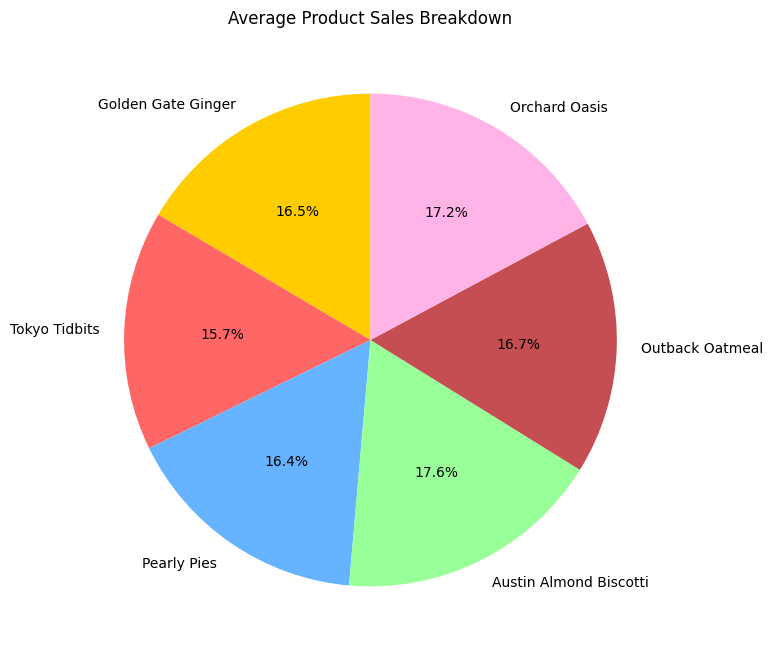

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import mean

# Group by product and calculate mean quantity
grouped = sales_transactions.groupBy('product').agg(mean('quantity').alias('mean_quantity'))

# Collect the data to the driver
grouped_data = grouped.collect()

# Extract product names and mean quantities
products = [row['product'] for row in grouped_data]
mean_quantities = [row['mean_quantity'] for row in grouped_data]

# Define colors for the pie chart
colors = ['#ffcc00', '#ff6666', '#66b3ff', '#99ff99', '#c44e52', '#ffb3e6']

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(mean_quantities, labels=products, colors=colors, autopct='%1.1f%%', startangle=90)

# Set the title of the pie chart
ax.set_title('Average Product Sales Breakdown')

# Display the pie chart
plt.show()

Looks like a pretty balanced dataset!